# Polygon vortex phase diagram

In [1]:
# Import the necessary Python packages

import numpy as np
import scipy.integrate as integrate
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
# Define functions given in paper

def zeta(H,xi):
    return H*(1-2*xi**2*np.log(R/xi)/(R**2-xi**2))**(-1)

def gamma(H,xi):
    return 2*np.pi*R*xi*np.sqrt(2*g*H)/np.sqrt(R**2-xi**2-2*xi**2*np.log(R/xi))

def x(H,f,xi):
    return 1/(2*np.pi)*np.sqrt(gamma(H,xi)/f)

def U(H,xi,r):
    return gamma(H,xi)/(2*np.pi*r)

def F(H,xi,m):
    return (1+np.exp(-2*m*zeta(H,xi)/R)*(xi/R)**(2*m))/(1-np.exp(-2*m*zeta(H,xi)/R)*(xi/R)**(2*m))

def Omegaxi(H,xi):
    return U(H,xi,xi)/xi

def OmegaR(H,xi):
    return U(H,xi,R)/R

def gc(H,xi):
    return gamma(H,xi)**2/(4*np.pi**2*xi**3)

def Dc(omega,H,xi,m):
    z1=Omegaxi(H,xi);
    z2=F(H,xi,m);
    return (omega-m*z1)**2-gc(H,xi)*m*z2/xi

def Dg(omega,H,xi,m):
    z1=OmegaR(H,xi);
    z2=F(H,xi,m);
    return (omega-m*z1)**2-g*m*z2/R

In [3]:
# Numerical integration in order to solve eq. 16

def integral(H,f,xi):
    return integrate.quad(lambda r: (r**2/x(H,f,xi)**2-1)**2,xi,R)

func = lambda f: integral(H,f,xi)[0]-zeta(H,xi)

In [4]:
# Parameter values

g=9.81;
R=0.097;

In [5]:
# Finding the lower bound of each state

### Algorithm ###
# Iterate over wave number (from 2 to 4) and height
# Resonance condition (11): find omega as a function of xi
# Solve omega=mU(R)/R for xi (lower limit) and omega=mU(xi)/xi (upper limit) for xi
# For a given xi, we solve func=0 and find f corresponding to some value of H

lower = np.empty([3,100])
Hlower = np.empty([3,100])

def equations(p):
    omega, xi = p
    return (Dc(omega,H,xi,m)*Dg(omega,H,xi,m)-m**2*g*gc(H,xi)*(F(H,xi,m)**2-1)/(xi*R), omega-m*U(H,xi,R)/R)

for m in range(2,5):
    for i in range(0,100):
        H = 0.024+i*0.0004
        Hlower[m-2,i] = H
        if m==2:
            omega, xi =  fsolve(equations, (5, 0.04-0.00001*i))
        if m==3:
            omega, xi =  fsolve(equations, (5, 0.055-0.00001*i))
        if m==4:
            omega, xi =  fsolve(equations, (5, 0.062-0.00005*i))
        fdown = fsolve(func,100*H+2.)[0]
        lower[m-2,i] = fdown

C:\Users\matte\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


(array([2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 8 Text yticklabel objects>)

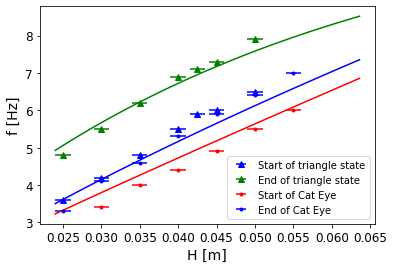

In [6]:
# Plotting the theoretical curves for beginning of Cat's eye, triangle and square, with experimental values and errors

plt.plot(Hlower[0],lower[0],'r-')
plt.plot(Hlower[1],lower[1],'b-')
plt.plot(Hlower[2],lower[2],'g-')
plt.errorbar([0.04,0.05,0.045,0.03,0.035,0.025,0.0425],[5.5,6.5,6.,4.2,4.8,3.6,5.9],xerr=0.001,fmt='b^',label='Start of triangle state')
plt.errorbar([0.04,0.05,0.045,0.03,0.035,0.025,0.0425],[6.9,7.9,7.3,5.5,6.2,4.8,7.1],xerr=0.001,fmt='g^',label='End of triangle state')
plt.errorbar([0.03,0.035,0.04,0.045,0.05,0.055],[3.4,4.,4.4,4.9,5.5,6],xerr=0.001,fmt='r.',label='Start of Cat Eye')
plt.errorbar([0.025,0.03,0.035,0.04,0.045,0.05,0.055],[3.3,4.1,4.6,5.3,5.9,6.4,7.],xerr=0.001,fmt='b.', label='End of Cat Eye')
plt.legend(fontsize=10)
plt.xlabel('H [m]',fontsize=14)
plt.ylabel('f [Hz]',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [7]:
### 2nd part: attempt at predicting the big cylinder behaviour. 2D model unsuccessful.

R=0.2;

lower = np.empty([4,100])
Hlower = np.empty([4,100])

def equations(p):
    omega, xi = p
    return (Dc(omega,H,xi,m)*Dg(omega,H,xi,m)-m**2*g*gc(H,xi)*(F(H,xi,m)**2-1)/(xi*R), omega-m*U(H,xi,R)/R)

for m in range(2,6):
    for i in range(0,100):
        H = 0.044+i*0.00035
        Hlower[m-2,i] = H
        if m==2:
            omega, xi =  fsolve(equations, (5, 0.04-0.00001*i))
        if m==3:
            omega, xi =  fsolve(equations, (5, 0.055-0.00001*i))
        if m==4:
            omega, xi =  fsolve(equations, (5, 0.05-0.00001*i))
        if m==5:
            omega, xi =  fsolve(equations, (5, 0.65-0.00005*i))
        fdown = fsolve(func,100*H)[0]
        lower[m-2,i] = fdown

C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\Users\matte\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.
C:\Users\matte\anaconda3\lib\sit

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Text yticklabel objects>)

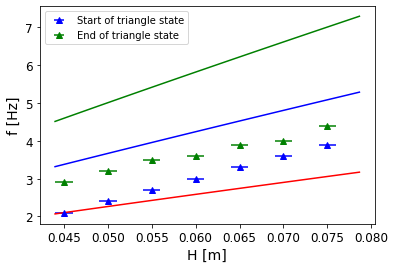

In [8]:
plt.plot(Hlower[0],lower[0],'r-')
plt.plot(Hlower[1],lower[1],'b-')
plt.plot(Hlower[2],lower[2],'g-')
plt.errorbar([0.045,0.05,0.055,0.06,0.065,0.07,0.075],[2.1,2.4,2.7,3.,3.3,3.6,3.9],xerr=0.001,fmt='b^',label='Start of triangle state')
plt.errorbar([0.045,0.05,0.055,0.06,0.065,0.07,0.075],[2.9,3.2,3.5,3.6,3.9,4,4.4],xerr=0.001,fmt='g^',label='End of triangle state')
plt.legend(fontsize=10)
plt.xlabel('H [m]',fontsize=14)
plt.ylabel('f [Hz]',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)